# Number Recognition System( Using ANN )
# Here I make a project on number recognition system on MNSIT dataset using keras ,there will be details of each step such that you understand that code efficiently

In [1]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train # the output column with predicted numbers (0-9)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

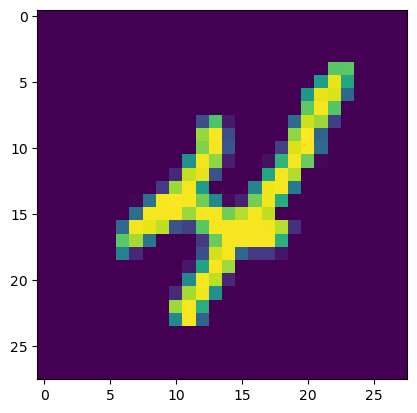

In [8]:
# lets see that number visually
import matplotlib.pyplot as plt
plt.imshow(X_train[9])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[9] #basically a array of 28*28 (pixels)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Creating Neural Network

In [11]:
# lets create the neural network
model=Sequential()
model.add(Flatten(input_shape=(28,28)))# as it is a 28*28 matrix we have to flat it or onvert it into 1-D array for input layer
model.add(Dense(128,activation='relu'))#hidden layer 1 with 128 nodes
model.add(Dense(32,activation='relu'))#hidden layer 2 with 32 nodes
model.add(Dense(10,activation='softmax'))#hidden layer 3 with 10 nodes

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics = ['accuracy'])# we use that loss function such that we dont require to use one hot encoding

In [14]:
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)#using validation to check overfitting

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.9162 - val_loss: 0.1540 - val_accuracy: 0.9531
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1211 - accuracy: 0.9641 - val_loss: 0.1187 - val_accuracy: 0.9643
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0840 - accuracy: 0.9746 - val_loss: 0.1083 - val_accuracy: 0.9697
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.1004 - val_accuracy: 0.9709
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0978 - val_accuracy: 0.9728
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.1025 - val_accuracy: 0.9723
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0961 - val_accuracy:

In [15]:
y_pred=model.predict(X_test)
y_pred.shape# a matrix of probablites of all numbers 0-9

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [16]:
# so we have to find the index with maximum probablity in each row
y_pred=y_pred.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [17]:
#calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9793

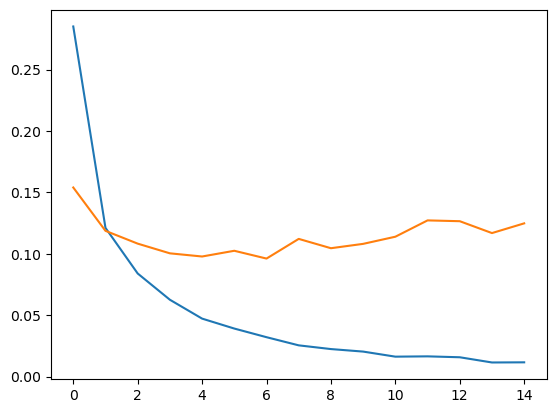

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

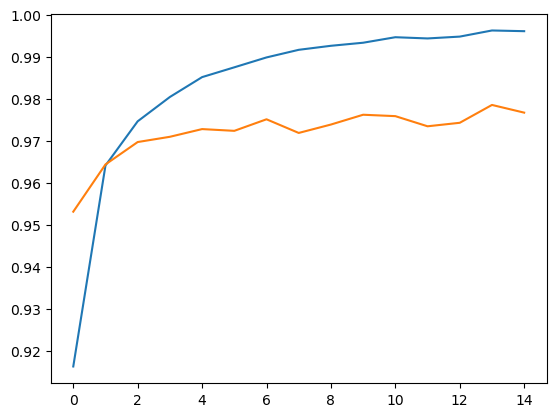

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

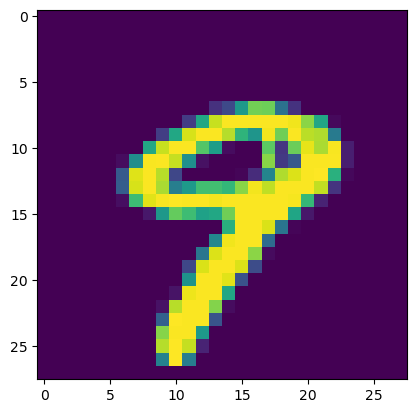

In [21]:
plt.imshow(X_test[9])

In [23]:
model.predict(X_test[9].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([9], dtype=int64)